### Load Library

In [3]:
import os
import re
import random
import logging
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment, effects

### Load Dataset

In [346]:
# load data
df = pd.read_csv('data/songs_wav.csv', sep=",")

df.head()

,title,nama_lagu,region,keyword,duration,url,path,wav_path
0,KICIR KICIR | Lagu Daerah Jakarta (Betawi) | D...,Kicir-kicir,Jakarta,Lagu Daerah Kicir-kicir asal Jakarta,280,https://www.youtube.com/watch?v=LU3YHPgRxQo,datasets/songs/kicir_kicir_lagu_daerah_jakarta...,datasets/wav_songs/kicir_kicir_lagu_daerah_jak...
1,KICIR KICIR - Lagu dan Tari Nusantara - Lagu Anak,Kicir-kicir,Jakarta,Lagu Daerah Kicir-kicir asal Jakarta,234,https://www.youtube.com/watch?v=0wTJULU2REc,datasets/songs/kicir_kicir_lagu_dan_tari_nusan...,datasets/wav_songs/kicir_kicir_lagu_dan_tari_n...
2,Kicir Kicir Jakarta,Kicir-kicir,Jakarta,Lagu Daerah Kicir-kicir asal Jakarta,232,https://www.youtube.com/watch?v=jMynoFKskhc,datasets/songs/kicir_kicir_jakarta.mp3,datasets/wav_songs/kicir_kicir_jakarta.wav
3,Kicir Kicir (Lagu Daerah Betawi),Kicir-kicir,Jakarta,Lagu Daerah Kicir-kicir asal Jakarta,237,https://www.youtube.com/watch?v=CcFbCjM2jsM,datasets/songs/kicir_kicir_lagu_daerah_betawi.mp3,datasets/wav_songs/kicir_kicir_lagu_daerah_bet...
4,KARAOKE KICIR KICIR Lagu Daerah Jakarta,Kicir-kicir,Jakarta,Lagu Daerah Kicir-kicir asal Jakarta,128,https://www.youtube.com/watch?v=nbO8hjzAN20,datasets/songs/karaoke_kicir_kicir_lagu_daerah...,datasets/wav_songs/karaoke_kicir_kicir_lagu_da...


### Data Preprocessing

In [347]:
def sanitize_filename(filename):
    """
    Removes or replaces invalid characters from a filename or folder name.
    
    Args:
        filename (str): The original filename or folder name.
        
    Returns:
        str: The sanitized filename or folder name.
    """
    return re.sub(r'[<>:"/\\|?*]', '', filename)

def normalized_yt_title(title):
    """
    Normalizes a YouTube title by converting it to lowercase, replacing spaces with underscores,
    and removing non-alphanumeric characters except underscores.
    
    Args:
        title (str): The original title of the YouTube video.
        
    Returns:
        str: The normalized title.
    """
    text = title.lower()
    text = text.replace(' ', '_')
    text = re.sub(r'[^a-z0-9_]', '', text)
    text = re.sub(r'_{2,}', '_', text)
    
    return text

def remove_silence(audio, threshold=20):
    """
    Removes silent sections from an audio signal based on a decibel threshold.
    
    Args:
        audio (ndarray): The audio signal as a numpy array.
        threshold (int): The decibel threshold to trim silence. Defaults to 20.
        
    Returns:
        ndarray: The trimmed audio signal.
    """
    return librosa.effects.trim(audio, top_db=threshold)[0]

def normalize_audio(audio):
    """
    Normalizes the audio signal to a standard volume level.
    
    Args:
        audio (AudioSegment): The audio segment to normalize.
        
    Returns:
        AudioSegment: The normalized audio segment.
    """
    return effects.normalize(audio)

split_result = []

def split_songs_to_segments(df, output_base_folder='datasets/30s_segments'):
    """
    Splits songs into 30-second segments and saves them as individual files.
    
    Args:
        df (DataFrame): A pandas DataFrame containing song metadata with 'wav_path' and 'nama_lagu' columns.
        output_base_folder (str): The base folder to save the segments. Defaults to 'datasets/30s_segments'.
        
    Returns:
        None
    """
    for index, row in df.iterrows():
        wav_path = row['wav_path']
        nama_lagu = row['nama_lagu']
        
        os.makedirs(f"{output_base_folder}/{normalized_yt_title(nama_lagu)}", exist_ok=True)
        
        audio = AudioSegment.from_wav(wav_path)
        audio = audio.set_channels(1)
        audio = normalize_audio(audio)
        
        total_duration = len(audio) / 1000
        segment_duration = 30
        num_segments = int(total_duration // segment_duration)
        
        for i in range(num_segments):
            start_time = i * segment_duration * 1000 
            end_time = (i + 1) * segment_duration * 1000
            segment = audio[start_time:end_time]
            
            segment_file = f"{output_base_folder}/{normalized_yt_title(nama_lagu)}/segment_{index}_{i}.wav"
            segment.export(segment_file, format="wav")
            
            split_result.append({
                'title': nama_lagu,
                '30s_path': segment_file
            })
        print(f"Saved {num_segments} segments for {nama_lagu} at: {output_base_folder}/{normalized_yt_title(nama_lagu)}")
        

In [348]:
split_songs_to_segments(df)

Saved 9 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 4 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 8 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 10 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 5 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 7 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 8 segments for Kicir-kicir at: datasets/30s_segments/kicirkicir
Saved 8 segments fo

In [349]:
# save split result to csv
split_result_df = pd.DataFrame(split_result)
split_result_df.to_csv('data/30s_segments.csv', index=False)

### Data Augmentation

In [4]:
df_res = pd.read_csv('data/30s_segments.csv', sep=",")
df_res.head()

,title,30s_path
0,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_0.wav
1,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_1.wav
2,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_2.wav
3,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_3.wav
4,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_4.wav


In [ ]:
def noise(data):
    """
    Adds random noise to an audio signal to augment data.

    Args:
        data (ndarray): The audio signal as a numpy array.

    Returns:
        ndarray: The audio signal with added noise.
    """
    noise_amp = 0.05 * np.random.uniform() * np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=1.0):
    """
    Stretches or compresses the audio by a given rate.

    Args:
        data (ndarray): The audio signal as a numpy array.
        rate (float): The rate to stretch the audio. A value > 1 speeds it up, < 1 slows it down.

    Returns:
        ndarray: The time-stretched audio signal.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch_shift(data, sample_rate):
    """
    Shifts the pitch of an audio signal.

    Args:
        data (ndarray): The audio signal as a numpy array.
        sample_rate (int): The sampling rate of the audio signal.

    Returns:
        ndarray: The pitch-shifted audio signal.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                       sample_rate, n_steps=pitch_change, 
                                       bins_per_octave=bins_per_octave)
    return data

def speedNpitch(data):
    """
    Adjusts both the speed and pitch of an audio signal.

    Args:
        data (ndarray): The audio signal as a numpy array.

    Returns:
        ndarray: The audio signal with modified speed and pitch.
    """
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

def pad_or_truncate(data, length):
    """
    Pads or truncates an audio signal to the specified length.

    Args:
        data (ndarray): The audio signal as a numpy array.
        length (int): The desired length of the audio signal.

    Returns:
        ndarray: The audio signal padded or truncated to the specified length.
    """
    if len(data) > length:
        return data[:length]
    elif len(data) < length:
        return np.pad(data, (0, length - len(data)), 'constant')
    
    return data

### Feature Extraction

In [12]:
# extract the feature using mfcc
extract_res = []
def mfcc_features(data):
    """
    Extract MFCC (Mel-frequency cepstral coefficients) features from the dataset.

    Args:
        data (pandas.DataFrame): A DataFrame containing paths to audio files and their titles.

    Returns:
        list: A list of dictionaries with titles, paths, and extracted features.
    """
    try:
        for index, row in data.iterrows():
            audio, sample_rate = librosa.load(row['30s_path'])
            mfcc_def = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)

            augmentations = [
                lambda x: noise(x),
                lambda x: speedNpitch(x)
            ]

            extract_res.append({
                'title': row['title'],
                '30s_path': row['30s_path'],
                'features': mfcc_def
            })

            for aug in augmentations:
                augmented_data = aug(audio)
                mfccs = np.mean(librosa.feature.mfcc(y=augmented_data, sr=sample_rate, n_mfcc=40).T, axis=0)
                extract_res.append({
                    'title': row['title'],
                    '30s_path': row['30s_path'],
                    'features': mfccs
                })
        return extract_res
    except Exception as e:
        logging.error(f"Error {e} encountered while parsing file: {data['30s_path']}")
        return None 

def chroma_features(file_path):
    """
    Extract chroma features from an audio file.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        numpy.ndarray: Processed chroma features.
    """
    try:
        audio, sample_rate = librosa.load(file_path) 
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        chroma_processed = np.mean(chroma.T,axis=0)
    except Exception as e:
        logging.error(f"Error encountered while parsing file: {file_path}")
        return None 
     
    return chroma_processed

def mel_features(file_path):
    """
    Extract Mel-spectrogram features from an audio file.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        numpy.ndarray: Processed Mel-spectrogram features.
    """
    try:
        audio, sample_rate = librosa.load(file_path) 
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        mel_processed = np.mean(mel.T,axis=0)
    except Exception as e:
        logging.error(f"Error encountered while parsing file: {file_path}")
        return None 
     
    return mel_processed

def combined_features(file_path):
    """
    Combine MFCC and chroma features from an audio file.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        numpy.ndarray: Concatenated features of MFCC and chroma.
    """
    mfcc = mfcc_features(file_path)
    chroma = chroma_features(file_path)
    # mel = mel_features(file_path)
    
    return np.concatenate((mfcc, chroma))

In [13]:
features = mfcc_features(df_res)
df_features = pd.DataFrame(features)

In [14]:
df_features.to_csv('data/30s_segments_features.csv', index=False)
df_features.head()

,title,30s_path,features
0,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_0.wav,"[-223.23761, 88.17508, 7.6728015, 24.971048, 0..."
1,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_0.wav,"[-184.69818980209448, 67.98061557127728, 12.16..."
2,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_0.wav,"[-283.71185, 65.34417, 5.757409, 13.2761345, 1..."
3,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_1.wav,"[-186.46893, 107.92975, 17.237621, 30.677818, ..."
4,Kicir-kicir,datasets/30s_segments/kicirkicir/segment_0_1.wav,"[-66.9032849298893, 41.36503363256182, 22.9487..."


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

label_encoder = LabelEncoder()

X = np.array(df_features['features'].tolist())
y = label_encoder.fit_transform(df_features['title'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [31]:
columns = ['class_name', 'class_code']
class_names = pd.DataFrame(columns=columns)
class_names['class_name'] = label_encoder.classes_
class_names['class_code'] = label_encoder.transform(label_encoder.classes_)

class_names.to_csv('model/class_names.csv', index=False)

In [32]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1456, 40, 1)
X_test shape: (365, 40, 1)


```py
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
```

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Bidirectional
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True,))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(units=64))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 40, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 40, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,405 (525.02 KB)

 Trainable params: 133,637 (522.02 KB)

 Non-trainable params: 768 (3.00 KB)

In [94]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.2566 - loss: 2.0605 - val_accuracy: 0.3151 - val_loss: 1.5331
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2704 - loss: 1.8288 - val_accuracy: 0.2438 - val_loss: 1.4959
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3359 - loss: 1.6115 - val_accuracy: 0.4411 - val_loss: 1.3417
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3446 - loss: 1.5617 - val_accuracy: 0.4000 - val_loss: 1.3717
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3938 - loss: 1.4616 - val_accuracy: 0.4356 - val_loss: 1.2819
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4162 - loss: 1.4639 - val_accuracy: 0.4137 - val_loss: 1.3150
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4251 - loss: 1.3970 - val_accuracy: 0.4877 - val_loss: 1.2316
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4410 - loss: 1.3363 - val_accuracy: 0.

In [95]:
train_hist = pd.DataFrame(history.history)
train_hist['epoch'] = history.epoch
train_hist.tail()

,accuracy,loss,val_accuracy,val_loss,epoch
58,0.934066,0.214120,0.882192,0.377462,58
59,0.939560,0.220512,0.865753,0.512053,59
60,0.956731,0.149957,0.882192,0.442002,60
61,0.961538,0.135879,0.895890,0.430879,61
62,0.949176,0.170509,0.912329,0.328265,62


### Model Evaluation

Test Accuracy: 91.23%


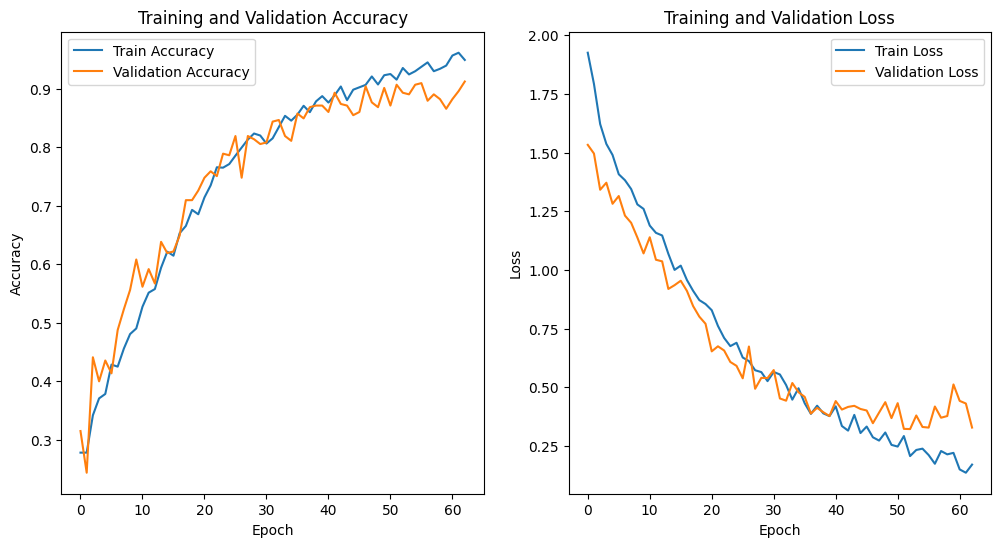

In [96]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")

# plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [97]:
# Get predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
test_accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Test Accuracy: 91.23%


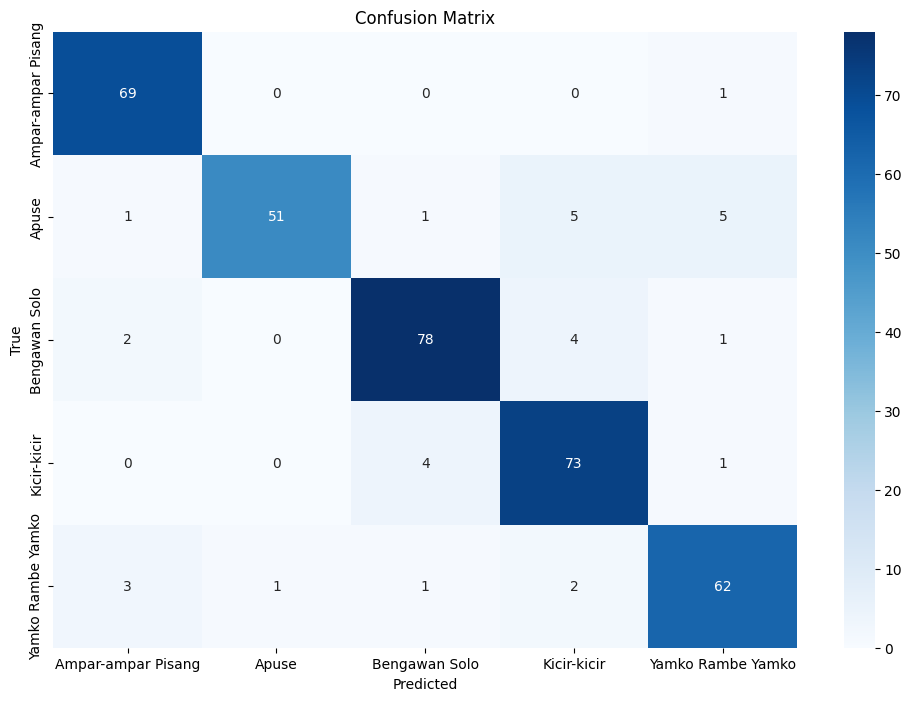

In [98]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model Prediction

In [99]:
from pydub import AudioSegment
from io import BytesIO
import noisereduce as nr

def convert_to_wav(audio_path):
    """
    Convert an audio file to WAV format with a single channel.

    Args:
        audio_path (str): Path to the input audio file.

    Returns:
        BytesIO: In-memory WAV file.
    """
    audio = AudioSegment.from_file(audio_path)
    audio.set_channels(1)
    wav_io = BytesIO()
    audio.export(wav_io, format="wav")
    wav_io.seek(0)
    return wav_io

# predict
def predict_song_genre(model, file_path):
    """
    Predict the genre of a song based on its audio features.

    Args:
        model: Trained machine learning model for genre classification.
        file_path (str): Path to the audio file to predict.
        label_encoder: Label encoder to decode the predicted class.

    Returns:
        tuple: Predicted class index, class probability, and class label.
    """
    wav = convert_to_wav(file_path)
    audio, sr = librosa.load(wav)
    features = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)
    
    if features is not None:
        # Make prediction
        pred_features = np.expand_dims(features.reshape(1, -1), axis=2)
        pred = model.predict(pred_features)
        pred_class = np.argmax(pred)
        
        # Get the predicted class label
        predicted_label = label_encoder.classes_[pred_class]
        
        # Get the predicted class probability
        pred_prob = pred[0][pred_class]
        
        return pred_class, pred_prob, predicted_label
    else:
        return None


In [103]:
# Test the prediction function
file_path = 'datasets/test'

for file in os.listdir(file_path):
    pred_class, pred_prob, pred_label = predict_song_genre(model, f"{file_path}/{file}")
    print(f"File {file}:\tPredicted Genre: {pred_label}\tProbability: {pred_prob:.2f}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
File Recording (4).m4a:	Predicted Genre: Ampar-ampar Pisang	Probability: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
File Recording (5).m4a:	Predicted Genre: Yamko Rambe Yamko	Probability: 0.97

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
File 2ampar-ampar.m4a:	Predicted Genre: Ampar-ampar Pisang	Probability: 0.61

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
File 1AMPAR-PL.mp3:	Predicted Genre: Ampar-ampar Pisang	Probability: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
File Recording (2).m4a:	Predicted Genre: Ampar-ampar Pisang	Probability: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
File Recording.m4a:	Predicted Genre: Ampar-ampar Pisang	Probability: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
File Recording (3).m4a:	Predicted Genre: Bengawan Solo	Probability: 0.99



### Save model

In [ ]:
import tensorflowjs as tfjs

# save model
model.save('model.keras')

# load model
# saved_model = tf.keras.models.load_model('best_model.keras')

# Save the model in TensorFlow.js format
# tfjs.converters.save_keras_model(saved_model, 'model/tfjs_model')